<a href="https://colab.research.google.com/github/lkhan123/IA/blob/master/Copy_of_IA1_Lucas_Moura_Igor_Cardoso_Marco_T%C3%BAlio_Fernando_Lobo_Lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ativando kaggle e importando base de dados: https://www.kaggle.com/rakeshrau/social-network-ads

IA Grupo: Lucas Moura, Fernando Lobo, Igor Cardoso, Marco Tulio
Exercício

1. a)**Alterando base de treino** - Ampliando a base de treino para 35%, verificamos aumento do acerto do score.

    b)**Diferentes números para K** -  Valores de K abaixo de 5 reduziram o valor percentual do score. Elevar para 6 também reduziu o score. Para valores acima de 7 não houve ganho de acerto em relação a K = 5.
    c)**Tentar prever gênero** - O resultado obteve score de acerto de apenas 42% para prever o gênero.
    
    

In [0]:
import pandas as pd
import numpy as np
import csv
import io
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from datetime import datetime as dt

social_network_url =  'https://drive.google.com/open?id=1-lIZKTn79d3_npyNrfI-M5AUIh1ikAKR'
social_network_content = requests.get(social_network_url).content 

In [0]:
social_network = pd.read_csv('https://raw.githubusercontent.com/lkhan123/IA/master/Social_Network_Ads.csv', sep = ',', encoding ='utf-8')
social_network.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
social_network.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Código

In [0]:
import pandas as pd
import numpy as np

In [0]:
social = social_network
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
X = social.iloc[:, [2, 3]].values
X[:5], X.shape

(array([[   19, 19000],
        [   35, 20000],
        [   26, 43000],
        [   27, 57000],
        [   19, 76000]]), (400, 2))

In [0]:
# A label (variável objetivo)
Y = social.iloc[:, 1].values
#y = y.where(y =='Male')


In [0]:
Y

array(['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
  

In [0]:
#@title Transformando os dados de texto para números
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_type = social_network['Gender']
num_category = le.fit_transform(status_type)
print(num_category)
#print(le.inverse_transform(num_category))

[1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0]


In [0]:
Y = num_category

In [0]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=.35, random_state=42)
len(X_treino), len(X_teste), len(Y_treino), len(Y_teste)

(260, 140, 260, 140)

In [0]:
from sklearn.preprocessing import StandardScaler

print(X_treino[:5], end='\n\n')
X_treino = StandardScaler().fit_transform(X_treino)
X_teste = StandardScaler().fit_transform(X_teste)
print(X_treino[:5])

[[   33 28000]
 [   19 25000]
 [   49 89000]
 [   31 15000]
 [   30 79000]]

[[-0.43329874 -1.23919342]
 [-1.80597706 -1.32753735]
 [ 1.1354765   0.55713303]
 [-0.62939564 -1.62201709]
 [-0.72744409  0.26265328]]


In [0]:
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=3)
classificador.fit(X_treino, Y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = classificador.predict(X_teste)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1])

In [0]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(Y_teste, y_pred)
mc

array([[31, 41],
       [40, 28]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_teste, y_pred)

0.42142857142857143

In [0]:
from sklearn.neighbors import KNeighborsClassifier

classificador = KNeighborsClassifier(n_neighbors=2)
classificador.fit(X_teste, Y_teste)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_teste, y_pred)

0.42142857142857143

## Gráficos sobre análises

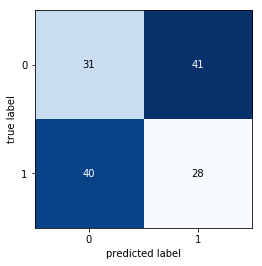

In [0]:
from mlxtend.plotting import plot_confusion_matrix

fig = plot_confusion_matrix(conf_mat=mc)

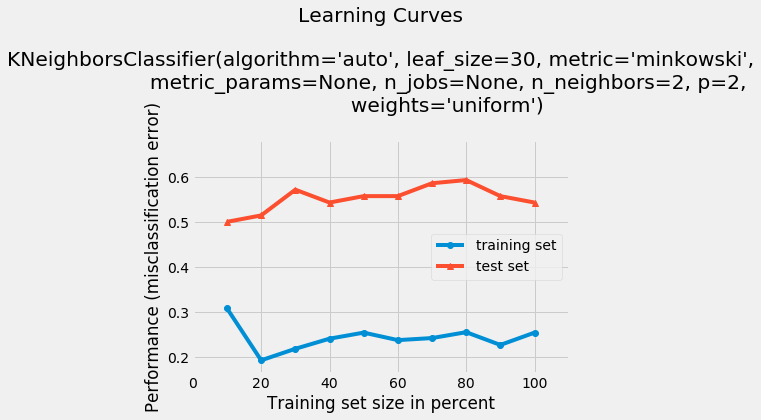

In [0]:
from mlxtend.plotting import plot_learning_curves
fig = plot_learning_curves(X_treino, Y_treino, X_teste, Y_teste, classificador)

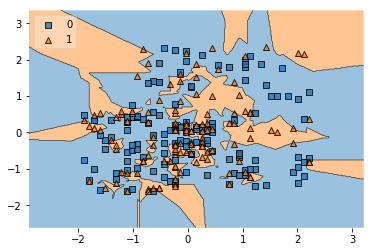

In [0]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_treino, Y_treino, clf=classificador, legend=2)

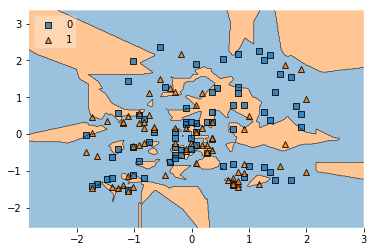

In [0]:
plot_decision_regions(X_teste, Y_teste, clf=classificador, legend=2)

## Seleção de características com o mlxtend

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


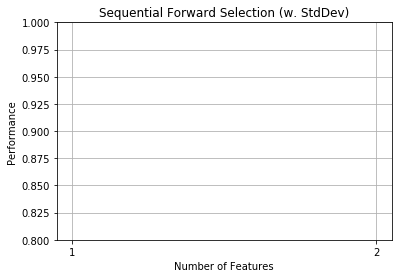

In [0]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = X_treino
y = Y_treino
knn = KNeighborsClassifier(n_neighbors=4)

sfs = SFS(knn, 
          k_features=2, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [0]:
from sklearn.naive_bayes import BernoulliNB
naivebayes = BernoulliNB()
naivebayes.fit(X_treino, Y_treino)
naivebayes.fit(X_teste, Y_teste)



print("Precisão Naive Bayes - Bernoulli - Treinando: {:.3f}".format(naivebayes.score(X_treino,Y_treino)))
print("Precisão Naive Bayes - Bernoulli -  Testando: {:.3f}".format(naivebayes.score(X_teste,Y_teste)))

Precisão Naive Bayes - Bernoulli - Treinando: 0.481
Precisão Naive Bayes - Bernoulli -  Testando: 0.550


In [0]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(X_treino,Y_treino)


print("Precisão da Árvore de Decisão Treinando: {:.3f}".format(arvore.score(X_treino,Y_treino)))
print("Precisão da Árvore de Decisão Testando: {:.3f}".format(arvore.score(X_teste,Y_teste)))

Precisão da Árvore de Decisão Treinando: 0.981
Precisão da Árvore de Decisão Testando: 0.500


**Exercício 2:** Implemente um código que faça o download da base https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 . Analise as informações dos tumores e classifique-os em malignos ou benignos. Utilize os três algoritmos aprendidos em sala de aula e faça uma comparação daquele que tem o melhor desempenho. Exiba os resultados graficamente

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

dados_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', sep = ',', encoding ='utf-8', names=['ID', 'Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean','Smoothness Mean','Compactness Mean','Concavity Mean','Points Mean','Symmetry Mean','Dimension Mean','Radius Se','Texture Se','Perimeter Se','Area Se','Smoothness Se','Compactness Se','Concavity Se','Points Se','Symmetry Se','Dimension Se','Radius Worst','Texture Worst','Perimeter Worst','Area Worst','Smoothness Worst','Compactness Worst','Concavity Worst','Points Worst','Symmetry Worst','Dimension Worst'])
dados_cancer.head()

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Points Mean,Symmetry Mean,Dimension Mean,Radius Se,Texture Se,Perimeter Se,Area Se,Smoothness Se,Compactness Se,Concavity Se,Points Se,Symmetry Se,Dimension Se,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Points Worst,Symmetry Worst,Dimension Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Separa os dados do Diagnostico de câncer e o torna mensurável**

In [0]:
diagnostico = dados_cancer.iloc[:, 1].values
diagnostico

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [0]:
#@title Transformando os dados de texto para números. Benigno ficou com '0' (zero) e maligno ficou com '1'.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_type = dados_cancer['Diagnosis']
diag_numerico = le.fit_transform(status_type)
print(diag_numerico)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

**Agora com os dados prontos, vamos rodar o Classificador KNN**

In [0]:
cancer_numeros = dados_cancer.iloc[:,2:]
X_train, X_test, y_train, y_test = train_test_split(cancer_numeros, diag_numerico, stratify = diag_numerico, test_size=.35, random_state=63)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Verificamos agora a precisão com o treinamento e o teste**

In [0]:
print("Precisão do KNN Treinando: {:.3f}".format(knn.score(X_train,y_train)))
print("Precisão do KNN Testando: {:.3f}".format(knn.score(X_test,y_test)))

Precisão do KNN Treinando: 0.973
Precisão do KNN Testando: 0.955


**Vamos verificar qual a quantidade de Neighbors ideal para esse algoritmo**

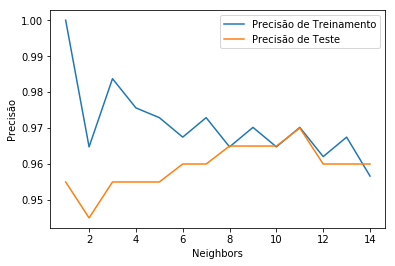

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer_numeros, diag_numerico, stratify = diag_numerico, test_size=.35, random_state=63)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

precisao_treinamento = []
precisao_teste = []

neighbors_range = range(1,15)

for neighbors in neighbors_range:
  knn_loop = KNeighborsClassifier(n_neighbors = neighbors)
  knn_loop.fit(X_train, y_train)
  precisao_treinamento.append(knn_loop.score(X_train,y_train))
  precisao_teste.append(knn_loop.score(X_test,y_test))

plt.plot(neighbors_range, precisao_treinamento, label='Precisão de Treinamento')
plt.plot(neighbors_range, precisao_teste, label='Precisão de Teste')
plt.ylabel('Precisão')
plt.xlabel('Neighbors')
plt.legend()

**Portanto a melhor precisão com KNN é aproximadamente com 11 vizinhos (neighbors). Já era esperado um número ímpar.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer_numeros, diag_numerico, stratify = diag_numerico, test_size=.35, random_state=63)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn_melhor = KNeighborsClassifier(n_neighbors = 11)
knn_melhor.fit(X_train, y_train)

print("Precisão do KNN Treinando: {:.3f}".format(knn_melhor.score(X_train,y_train)))
print("Precisão do KNN Testando: {:.3f}".format(knn_melhor.score(X_test,y_test)))


Precisão do KNN Treinando: 0.970
Precisão do KNN Testando: 0.970


In [0]:
y_pred = knn_melhor.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1])

In [0]:
mc = confusion_matrix(y_test, y_pred)
mc

array([[123,   2],
       [  4,  71]])

In [0]:
accuracy_score(y_test, y_pred)

0.97

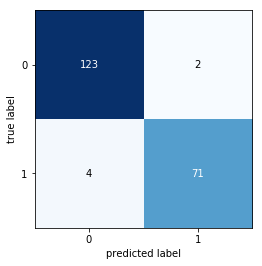

In [0]:
fig = plot_confusion_matrix(conf_mat=mc)

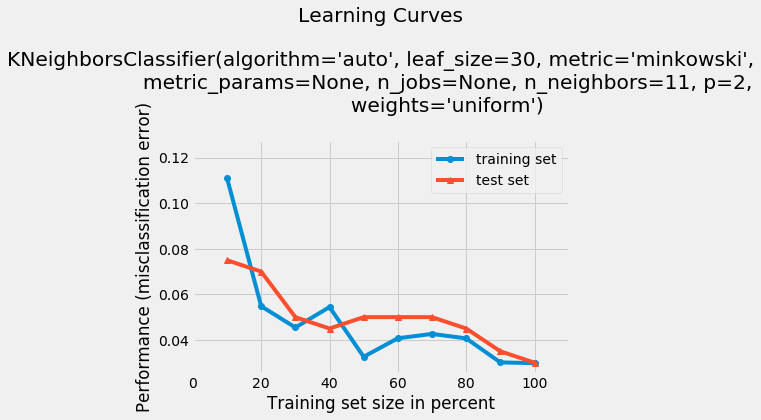

In [0]:
fig = plot_learning_curves(X_train, y_train, X_test, y_test, knn_melhor)

In [0]:
#plot_decision_regions(X_train, y_train, clf=knn_melhor, legend=2)

In [0]:
#plot_decision_regions(X_test, y_test, clf=knn_melhor, legend=2)

**Agora o teste com algoritmo de Probabilidade (Bayes)**

In [0]:
probabilidade = GaussianNB()
probabilidade.fit(X_train, y_train)

print("Precisão da Gaussiana Treinando: {:.3f}".format(probabilidade.score(X_train,y_train)))
print("Precisão da Gaussiana Testando: {:.3f}".format(probabilidade.score(X_test,y_test)))

Precisão da Gaussiana Treinando: 0.943
Precisão da Gaussiana Testando: 0.925


In [0]:
y_pred_gauss = probabilidade.predict(X_test)
y_pred_gauss

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1])

In [0]:
mc_gauss = confusion_matrix(y_test, y_pred_gauss)
mc_gauss

array([[117,   8],
       [  7,  68]])

In [0]:
accuracy_score(y_test, y_pred_gauss)

0.925

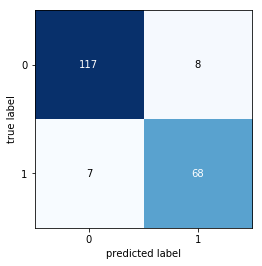

In [0]:
fig = plot_confusion_matrix(conf_mat=mc_gauss)

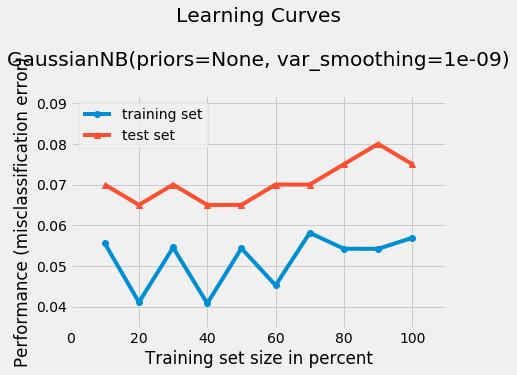

In [0]:
fig = plot_learning_curves(X_train, y_train, X_test, y_test, probabilidade)

In [0]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(X_train, y_train)


print("Precisão da Árvore de Decisão Treinando: {:.3f}".format(arvore.score(X_train,y_train)))
print("Precisão da Árvore de Decisão Testando: {:.3f}".format(arvore.score(X_test,y_test)))

Precisão da Árvore de Decisão Treinando: 1.000
Precisão da Árvore de Decisão Testando: 0.915


In [0]:
y_pred_arvore = arvore.predict(X_test)
y_pred_arvore

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1])

In [0]:
mc_arvore = confusion_matrix(y_test, y_pred_arvore)
mc_arvore

array([[117,   8],
       [  9,  66]])

In [0]:
accuracy_score(y_test, y_pred_arvore)

0.915

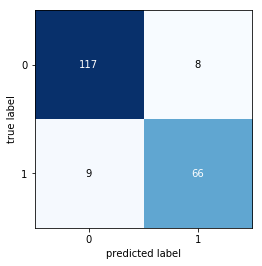

In [0]:
fig = plot_confusion_matrix(conf_mat=mc_arvore)

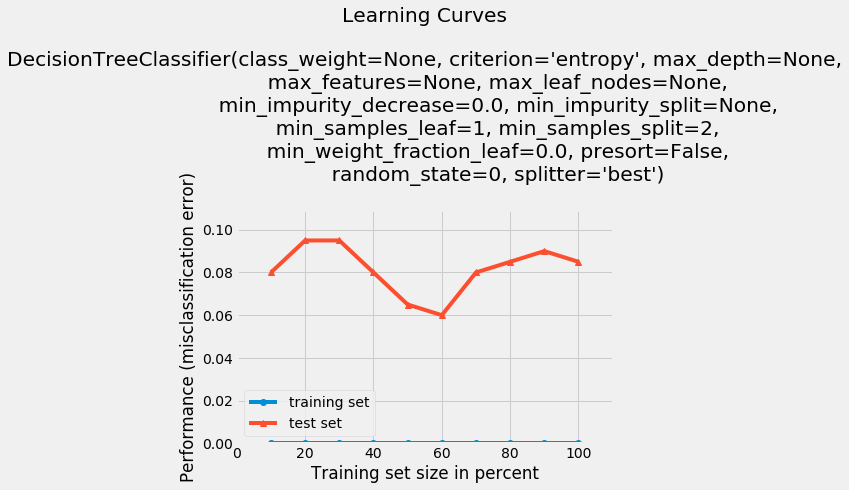

In [0]:
fig = plot_learning_curves(X_train, y_train, X_test, y_test, arvore)

**PORTANTO CONCLUI-SE QUE:
O ALGORITMO KNN APRESENTOU MELHOR PERFORMANCE. COM PRECISÃO DE 97% E COM A CURVA DE APRENDIZADO DIMINUINDO O ERRO. Os demais algoritmos apresentaram precisões inferiores e curvas de treinamento que não estavam convergindo para a diminuição dos erros, portanto dificilmente irão melhorar com novos dados para treinamento**

**Exercício 3:** Refine o exercício 2. Utilize técnicas de seleção de características (como a utilizada no exemplo, via mlxtend). Compare a relevância das features para a classificação para cada um dos algoritmos. É possível reduzir o número de características sem perder precisão na classificação? Avalie tanto a seleção sequencial quando a seleção por força bruta. Analise e exiba os resultados.

**PARA KNN - SEQUENCIAL**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


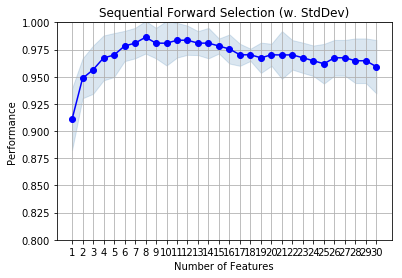

In [0]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = X_train
y = y_train
knn = KNeighborsClassifier(n_neighbors=11)

sfs = SFS(knn, 
          k_features=30, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**PARA KNN - FORÇA BRUTA**

In [0]:
knn = KNeighborsClassifier(n_neighbors=11)

efs = EFS(knn, 
           min_features=1,
           max_features=10,
           scoring='accuracy',
           print_progress=False,
           cv=5,
           n_jobs=-1)

efs = efs.fit(X, y)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

#fig1 = plot_efs(efs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
#plt.title('Brute force Forward Selection (w. StdDev)')
#plt.grid()
#plt.show()

KeyboardInterrupt: ignored

**PARA ALGORITMO DE PROBABILIDADE - SEQUENCIAL**

In [0]:
probabilidade = GaussianNB()

sfs = SFS(probabilidade, 
          k_features=10, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**PARA ALGORITMO DE PROBABILIDADE - FORÇA BRUTA**

In [0]:
probabilidade = GaussianNB()

efs = EFS(probabilidade, 
           min_features=1,
           max_features=10,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs = efs.fit(X, y)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

#fig1 = plot_efs(efs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
#plt.title('Brute force Forward Selection (w. StdDev)')
#plt.grid()
#plt.show()

**PARA ÁRVORES DE DECISÃO - SEQUENCIAL**

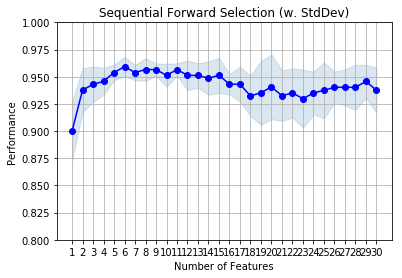

In [0]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

sfs = SFS(arvore, 
          k_features=30, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**PARA ÁRVORES DE DECISÃO - FORÇA BRUTA**

In [0]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

efs = EFS(arvore, 
           min_features=1,
           max_features=30,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs = efs.fit(X, y)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

#fig1 = plot_efs(efs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
#plt.title('Brute force Forward Selection (w. StdDev)')
#plt.grid()
#plt.show()

**É possivel verificar com o algoritmo KNN possui seu melhor desempenho com apenas 8 Features, enquanto o de probabilidade com 9 Features, sendo que ambos muito próximos em acerto. O algoritmo de árvores de decisão, independente do número de Features, não apresentou melhoras significativas. O algoritmo de probabilidade apresentou uma queda significativa na performance conforme aumentava o número de features, porém mesmo em seu melhor desempenho (9 Features) ainda não superou o algoritmo KNN em sua melhorm performance (8 Features)**


**O algoritmo de força bruta apresentou (aguardando processamento...)**

### Exercício 4
O sklearn tem um submódulo com algumas bases de dados (pesquise no google sklearn datasets). Crie um código para realizar a classificação dos tipos de plantas da iris dataset. Utilize os métodos de seleção de características para tentar não utilizar todas as características disponíveis. Aponte o melhor subconjunto de apenas 2 características para classificação. Utilize PCA para realizar redução de dimensionalidade. Compare com o PCA 2D com a seleção de características. Qual foi o melhor resultado? Quão melhor / pior é utilizar todas as características disponíveis? Apresente os resultados utilizando todos os três algoritmos aprendidos em sala de aula.

#Resposta do Exercício 4

Utilizando o conjunto de dados já presentes no sklearn, em particular o iris_dataset, vamos ver qual subconjunto de duas características tem o melhor resultado em classificação de dados. Para isso, primeiro é preciso entender o formato em que se encontra o dataset fornecido pelo sci-kit learn:

In [0]:
# Importando as bibliotecas necessárias
import numpy as np
from sklearn import neighbors, datasets

In [0]:
# obtenção da base iris e análise de sua estrutura básica
iris_db = sklearn.datasets.load_iris()
print(iris_db.feature_names)
print(iris_db.data[0:4])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


Com isso, podemos concluir que os dados estão no formato de um array de quatro elementos (para cada ponto do dataset), nos quais os dois primeiros são o comprimento e a largura da sépala,
e os dois últimos, o comprimento e a largura da pétala. Podemos fazer seleções dos elementos do dataset, e verificar qual subset tem o melhor resultado, para no final, comparar com o método PCA. Serão feito os seguintes subsets:

* sepal_lenght x sepal_width
* sepal_lenght x petal_lenght
* sepal_lenght x petal_width
* sepal_width x petal_lenght
* sepal_width x petal_width
* petal_lenght x petal_width

Porém, para garantir um resultado comparável entre os seis subsets, o primeiro passo a ser executado é a divisão da base
de dados iris em um grupo de treino e outro de teste, pois a mudança dos dados utilizados pra treino e teste sempre afeta
o resultado final de um algoritmo KNN. Para garantir que será uma comparação entre "laranjas e laranjas" e não de
"laranjas e melões", essa separação dos grupos deve ser feita nesse momento:

In [0]:
# Normalização do banco de dados, para evitar o problema dos outliers
iris_db_norm = normalize(iris_db.data)

In [0]:
from sklearn.model_selection import train_test_split

# Separação dos dados da base em teste e treino, usando o model_selection do sci-kit learn
# Definindo o resultado com 40% para teste e 60% para treino
x_treino, x_teste, y_treino, y_teste = train_test_split(iris_db_norm, iris_db.target, test_size=0.4)

In [0]:
# Criação dos subsets do grupo de treino da base (com duas dimensões)
sl_sw_treino = []
sl_pl_treino = []
sl_pw_treino = []
sw_pl_treino = []
sw_pw_treino = []
pl_pw_treino = []

for point in x_treino:
  sl_sw_treino.append(point[:2])
  
for point in x_treino:
  sl_pl_treino.append([point[0], point[2]])

for point in x_treino:
  sl_pw_treino.append([point[0], point[3]])
  
for point in x_treino:
  sw_pl_treino.append([point[1], point[2]])
  
for point in x_treino:
  sw_pw_treino.append([point[1], point[3]])
  
for point in x_treino:
  pl_pw_treino.append([point[2], point[3]])

In [0]:
# Criação dos subsets do grupo de teste da base (com duas dimensões)
sl_sw_teste = []
sl_pl_teste = []
sl_pw_teste = []
sw_pl_teste = []
sw_pw_teste = []
pl_pw_teste = []

for point in x_teste:
  sl_sw_teste.append(point[:2])
  
for point in x_teste:
  sl_pl_teste.append([point[0], point[2]])

for point in x_teste:
  sl_pw_teste.append([point[0], point[3]])
  
for point in x_teste:
  sw_pl_teste.append([point[1], point[2]])
  
for point in x_teste:
  sw_pw_teste.append([point[1], point[3]])
  
for point in x_teste:
  pl_pw_teste.append([point[2], point[3]])

In [0]:
# Plotagem dos pontos por cores em um gráfico
cor = []

for i in range(len(iris_db.data)):
    if iris_db.target[i] == 2:
        cor.append('b')
    elif iris_db.target[i] == 0:
        cor.append('r')
    else:
        cor.append('green')

###Análise gráfica dos seis subsets em sequência

sepal_length X sepal_width


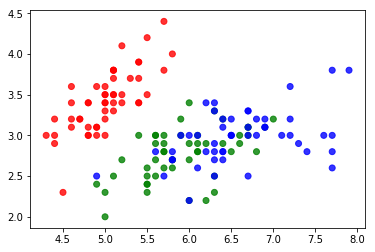

sepal_length X petal_lenght


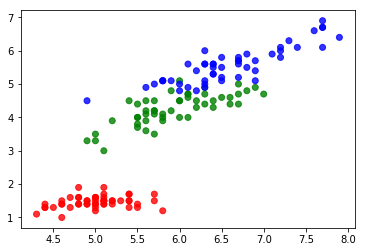

sepal_length X petal_width


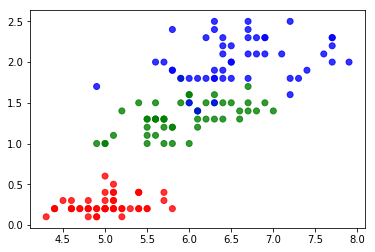

sepal_width X petal_lenght


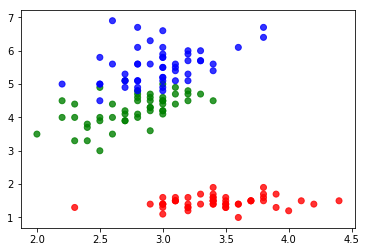

sepal_width X petal_width


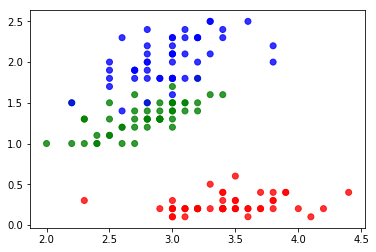

petal_lenght X petal_width


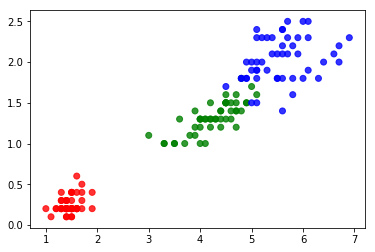

In [0]:
# Plotagem de gráficos para a análise gráfica
print("sepal_length X sepal_width")
plt.scatter([i[0] for i in iris_db.data], [j[1] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

print("sepal_length X petal_lenght")
plt.scatter([i[0] for i in iris_db.data], [j[2] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

print("sepal_length X petal_width")
plt.scatter([i[0] for i in iris_db.data], [j[3] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

print("sepal_width X petal_lenght")
plt.scatter([i[1] for i in iris_db.data], [j[2] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

print("sepal_width X petal_width")
plt.scatter([i[1] for i in iris_db.data], [j[3] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

print("petal_lenght X petal_width")
plt.scatter([i[2] for i in iris_db.data], [j[3] for j in iris_db.data], c=cor,alpha=0.8)
plt.show()

Como é possível observar, mesmo esse subset do dataset iris possui três grupos, um linearmente separável dos outros dois, e os outros dois não-linearmente separáveis (Desconsiderando alta dimensionalidade). Vamos verificar quais dos subsets fornece um resultado melhor com o mesmo classificador KNN:

### Análise de acurácia com classificador KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Executando a classificação KNN para K = 3
sl_sw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
sl_sw_knn.fit(sl_sw_treino, y_treino)

sl_pl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
sl_pl_knn.fit(sl_pl_treino, y_treino)

sl_pw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
sl_pw_knn.fit(sl_pw_treino, y_treino)

sw_pl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
sw_pl_knn.fit(sw_pl_treino, y_treino)

sw_pw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
sw_pw_knn.fit(sw_pw_treino, y_treino)

pl_pw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
pl_pw_knn.fit(pl_pw_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
sl_sw_acuracia = sl_sw_knn.score(sl_sw_teste, y_teste)
print("sepal lenght X sepal width: " + str(round(sl_sw_acuracia * 100, 1)) + "%")

sl_pl_acuracia = sl_pl_knn.score(sl_pl_teste, y_teste)
print("sepal lenght X petal lenght: " + str(round(sl_pl_acuracia * 100, 1)) + "%")

sl_pw_acuracia = sl_pw_knn.score(sl_pw_teste, y_teste)
print("sepal lenght X petal width: " + str(round(sl_pw_acuracia * 100, 1)) + "%")

sw_pl_acuracia = sw_pl_knn.score(sw_pl_teste, y_teste)
print("sepal width X petal lenght: " + str(round(sw_pl_acuracia * 100, 1)) + "%")

sw_pw_acuracia = sw_pw_knn.score(sw_pw_teste, y_teste)
print("sepal width X petal width: " + str(round(sw_pw_acuracia * 100, 1)) + "%")

pl_pw_acuracia = pl_pw_knn.score(pl_pw_teste, y_teste)
print("petal lenght X petal width: " + str(round(pl_pw_acuracia * 100, 1)) + "%")

sepal lenght X sepal width: 100.0%
sepal lenght X petal lenght: 93.3%
sepal lenght X petal width: 93.3%
sepal width X petal lenght: 96.7%
sepal width X petal width: 88.3%
petal lenght X petal width: 96.7%


Como é possível observar, de todos os subsets utilizados, o que consistentemente tem um resultado de classificação melhor (após normalização divisão aleatória da base em treino e teste) é o subset envolvendo o comprimento da sépala e a largura da sépala, embora olhando no gráfico, não seja intuitivo afirmar isso. O gráfico desse subset mostra os pontos das flores virginica e versicolor amplamente misturados, ao contrário de outros gráficos de outros subsets. Porém, a análise matemática não deixa dúvidas, mesmo após uma redivisão da base, a tendência é sempre do subset sl_sw ter o melhor desempenho na base iris. Resta então saber se a aplicação do PCA (Principal Component Analysis) para redução de dimensão dessa base, permite uma classificação melhor do dataset utilizando a base por completo (No algoritmo KNN, obviamente)

### Análise gráfica com tratamento dos dados por PCA

In [0]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados para obtenção do PCA
x = StandardScaler().fit_transform(iris_db.data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_db_pca = pca.fit_transform(x)

Principal Component Analysis (2 dimen)


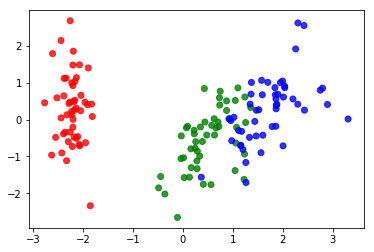

In [0]:
print("Principal Component Analysis (2 dimen)")
plt.scatter([i[0] for i in iris_db_pca], [j[1] for j in iris_db_pca], c=cor,alpha=0.8)
plt.show()

Esse gráfico, representa o banco de dados IRIS com suas 4 dimensões reduzidas para 2 dimensões através do PCA (Principal Component Analysis), simplificando assim o volume de dados necessários para se classificar os três tipos de flores. Como é possível ver, trata-se de um gráfico bastante parecido com os gráficos dos subsets - Um tipo de flor é linearmente separável, enquanto as outras duas não o são. Vejamos como a taxa de acurácia se comporta com esses dados:

### Acurácia de classificação em KNN com tratamento por PCA

In [0]:
# Separação dos dados da base em teste e treino, usando o model_selection do sci-kit learn
# Definindo o resultado com 40% para teste e 60% para treino
x_pca_treino, x_pca_teste, y_pca_treino, y_pca_teste = train_test_split(iris_db_pca, iris_db.target, test_size=0.4)

pca_knn = KNeighborsClassifier(n_neighbors=3, p=2)
pca_knn.fit(x_pca_treino, y_pca_treino)

pca_acuracia = pca_knn.score(x_pca_teste, y_pca_teste)
print("Acurácia com PCA (2 dimen): " + str(round(pca_acuracia * 100, 1)) + "%")

Acurácia com PCA (2 dimen): 90.0%


Obviamente esse resultado irá variar conforme os dados forem divididos em treino e teste, mas nota-se que de um modo geral, a taxa de acerto do algoritmo com PCA é bastante próxima, e se for inferior, apenas levemente inferior ao subset "sepal lenght x sepal width" analisado anteriormente.

### Exercício 5
Utilize todos os recursos aprendidos e faça a classificação dos dados da base wine dataset, constante na biblioteca sklearn

# Resposta do Exercício 5

As análises para o exercício 5 se darão da mesma forma que o exercício 4, utilizando apenas um dataset diferente, a base "wine" do sklearn.

In [0]:
# obtenção da base iris e análise de sua estrutura básica
wine_db = datasets.load_wine()
print(wine_db.feature_names)
print(wine_db.data[0:4])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]


A principal diferença entre o dataset wine e o dataset iris, está no número de colunas (dimensões) que os datasets possuem. No caso do dataset wine, são um total de 13 colunas, o que irá complicar um pouco a criação de subsets para análise.

Obs: Não será feita uma análise de todos os subsets que o dataset apresenta, pois tal análise pouco acrescentaria na solução do problema como um todo, e seria por demais dispendiosa em termos de tempo.

In [0]:
# Normalização do banco de dados, para evitar o problema dos outliers
wine_db_norm = normalize(wine_db.data)

# Separação dos dados da base em teste e treino, usando o model_selection do sci-kit learn
# Definindo o resultado com 40% para teste e 60% para treino
x_wine_treino, x_wine_teste, y_wine_treino, y_wine_teste = train_test_split(wine_db_norm, wine_db.target, test_size=0.4)

# Criação dos subsets do grupo de treino da base (com duas dimensões)
al_ma_treino = []
al_as_treino = []
al_aa_treino = []
al_mg_treino = []
al_tp_treino = []
al_fl_treino = []
al_np_treino = []
al_pr_treino = []
al_ci_treino = []
al_hu_treino = []
al_dw_treino = []
al_pl_treino = []

ma_as_treino = []
ma_aa_treino = []
ma_mg_treino = []
ma_tp_treino = []
ma_fl_treino = []
ma_np_treino = []
ma_pr_treino = []
ma_ci_treino = []
ma_hu_treino = []
ma_dw_treino = []
ma_pl_treino = []

for point in x_wine_treino:
  al_ma_treino.append(point[:2])
  
for point in x_wine_treino:
  al_as_treino.append([point[0], point[2]])

for point in x_wine_treino:
  al_aa_treino.append([point[0], point[3]])
  
for point in x_wine_treino:
  al_mg_treino.append([point[0], point[4]])
  
for point in x_wine_treino:
  al_tp_treino.append([point[0], point[5]])
  
for point in x_wine_treino:
  al_fl_treino.append([point[0], point[6]])
  
for point in x_wine_treino:
  al_np_treino.append([point[0], point[7]])
  
for point in x_wine_treino:
  al_pr_treino.append([point[0], point[8]])
  
for point in x_wine_treino:
  al_ci_treino.append([point[0], point[9]])
  
for point in x_wine_treino:
  al_hu_treino.append([point[0], point[10]])
  
for point in x_wine_treino:
  al_dw_treino.append([point[0], point[11]])
  
for point in x_wine_treino:
  al_pl_treino.append([point[0], point[12]])
  
  
for point in x_wine_treino:
  ma_as_treino.append([point[1], point[2]])

for point in x_wine_treino:
  ma_aa_treino.append([point[1], point[3]])
  
for point in x_wine_treino:
  ma_mg_treino.append([point[1], point[4]])
  
for point in x_wine_treino:
  ma_tp_treino.append([point[1], point[5]])
  
for point in x_wine_treino:
  ma_fl_treino.append([point[1], point[6]])
  
for point in x_wine_treino:
  ma_np_treino.append([point[1], point[7]])
  
for point in x_wine_treino:
  ma_pr_treino.append([point[1], point[8]])
  
for point in x_wine_treino:
  ma_ci_treino.append([point[1], point[9]])
  
for point in x_wine_treino:
  ma_hu_treino.append([point[1], point[10]])
  
for point in x_wine_treino:
  ma_dw_treino.append([point[1], point[11]])
  
for point in x_wine_treino:
  ma_pl_treino.append([point[1], point[12]])

In [0]:
# Criação dos subsets do grupo de treino da base (com duas dimensões)
al_ma_teste = []
al_as_teste = []
al_aa_teste = []
al_mg_teste = []
al_tp_teste = []
al_fl_teste = []
al_np_teste = []
al_pr_teste = []
al_ci_teste = []
al_hu_teste = []
al_dw_teste = []
al_pl_teste = []

ma_as_teste = []
ma_aa_teste = []
ma_mg_teste = []
ma_tp_teste = []
ma_fl_teste = []
ma_np_teste = []
ma_pr_teste = []
ma_ci_teste = []
ma_hu_teste = []
ma_dw_teste = []
ma_pl_teste = []

for point in x_wine_teste:
  al_ma_teste.append(point[:2])
  
for point in x_wine_teste:
  al_as_teste.append([point[0], point[2]])

for point in x_wine_teste:
  al_aa_teste.append([point[0], point[3]])
  
for point in x_wine_teste:
  al_mg_teste.append([point[0], point[4]])
  
for point in x_wine_teste:
  al_tp_teste.append([point[0], point[5]])
  
for point in x_wine_teste:
  al_fl_teste.append([point[0], point[6]])
  
for point in x_wine_teste:
  al_np_teste.append([point[0], point[7]])
  
for point in x_wine_teste:
  al_pr_teste.append([point[0], point[8]])
  
for point in x_wine_teste:
  al_ci_teste.append([point[0], point[9]])
  
for point in x_wine_teste:
  al_hu_teste.append([point[0], point[10]])
  
for point in x_wine_teste:
  al_dw_teste.append([point[0], point[11]])
  
for point in x_wine_teste:
  al_pl_teste.append([point[0], point[12]])
  
  
for point in x_wine_teste:
  ma_as_teste.append([point[1], point[2]])

for point in x_wine_teste:
  ma_aa_teste.append([point[1], point[3]])
  
for point in x_wine_teste:
  ma_mg_teste.append([point[1], point[4]])
  
for point in x_wine_teste:
  ma_tp_teste.append([point[1], point[5]])
  
for point in x_wine_teste:
  ma_fl_teste.append([point[1], point[6]])
  
for point in x_wine_teste:
  ma_np_teste.append([point[1], point[7]])
  
for point in x_wine_teste:
  ma_pr_teste.append([point[1], point[8]])
  
for point in x_wine_teste:
  ma_ci_teste.append([point[1], point[9]])
  
for point in x_wine_teste:
  ma_hu_teste.append([point[1], point[10]])
  
for point in x_wine_teste:
  ma_dw_teste.append([point[1], point[11]])
  
for point in x_wine_teste:
  ma_pl_teste.append([point[1], point[12]])

### Análise de acurácia com classificador KNN

In [0]:
# Executando a classificação KNN para K = 3
al_ma_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_ma_knn.fit(al_ma_treino, y_wine_treino)

al_as_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_as_knn.fit(al_as_treino, y_wine_treino)

al_aa_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_aa_knn.fit(al_aa_treino, y_wine_treino)

al_mg_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_mg_knn.fit(al_mg_treino, y_wine_treino)

al_tp_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_tp_knn.fit(al_tp_treino, y_wine_treino)

al_fl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_fl_knn.fit(al_fl_treino, y_wine_treino)

al_np_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_np_knn.fit(al_np_treino, y_wine_treino)

al_pr_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_pr_knn.fit(al_pr_treino, y_wine_treino)

al_ci_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_ci_knn.fit(al_ci_treino, y_wine_treino)

al_hu_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_hu_knn.fit(al_hu_treino, y_wine_treino)

al_dw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_dw_knn.fit(al_dw_treino, y_wine_treino)

al_pl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
al_pl_knn.fit(al_pl_treino, y_wine_treino)


ma_as_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_as_knn.fit(ma_as_treino, y_wine_treino)

ma_aa_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_aa_knn.fit(ma_aa_treino, y_wine_treino)

ma_mg_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_mg_knn.fit(ma_mg_treino, y_wine_treino)

ma_tp_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_tp_knn.fit(ma_tp_treino, y_wine_treino)

ma_fl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_fl_knn.fit(ma_fl_treino, y_wine_treino)

ma_np_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_np_knn.fit(ma_np_treino, y_wine_treino)

ma_pr_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_pr_knn.fit(ma_pr_treino, y_wine_treino)

ma_ci_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_ci_knn.fit(ma_ci_treino, y_wine_treino)

ma_hu_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_hu_knn.fit(ma_hu_treino, y_wine_treino)

ma_dw_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_dw_knn.fit(ma_dw_treino, y_wine_treino)

ma_pl_knn = KNeighborsClassifier(n_neighbors=3, p=2)
ma_pl_knn.fit(ma_pl_treino, y_wine_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
al_ma_acuracia = al_ma_knn.score(al_ma_teste, y_wine_teste)
print("alcohol X malic acid: " + str(round(al_ma_acuracia * 100, 1)) + "%")

al_as_acuracia = al_as_knn.score(al_as_teste, y_wine_teste)
print("alcohol X ash: " + str(round(al_as_acuracia * 100, 1)) + "%")

al_aa_acuracia = al_aa_knn.score(al_aa_teste, y_wine_teste)
print("alcohol X alcalinity_of_ash: " + str(round(al_aa_acuracia * 100, 1)) + "%")

al_mg_acuracia = al_mg_knn.score(al_mg_teste, y_wine_teste)
print("alcohol X magnesium: " + str(round(al_mg_acuracia * 100, 1)) + "%")

al_tp_acuracia = al_tp_knn.score(al_tp_teste, y_wine_teste)
print("alcohol X total phenols: " + str(round(al_tp_acuracia * 100, 1)) + "%")

al_fl_acuracia = al_fl_knn.score(al_fl_teste, y_wine_teste)
print("alcohol X flavonoids: " + str(round(al_fl_acuracia * 100, 1)) + "%")

al_np_acuracia = al_np_knn.score(al_np_teste, y_wine_teste)
print("alcohol X nonflavonoid_phenols: " + str(round(al_np_acuracia * 100, 1)) + "%")

al_pr_acuracia = al_pr_knn.score(al_pr_teste, y_wine_teste)
print("alcohol X proanthocyanins: " + str(round(al_pr_acuracia * 100, 1)) + "%")

al_ci_acuracia = al_ci_knn.score(al_ci_teste, y_wine_teste)
print("alcohol X color_intensity: " + str(round(al_ci_acuracia * 100, 1)) + "%")

al_hu_acuracia = al_hu_knn.score(al_hu_teste, y_wine_teste)
print("alcohol X hue: " + str(round(al_hu_acuracia * 100, 1)) + "%")

al_dw_acuracia = al_dw_knn.score(al_dw_teste, y_wine_teste)
print("alcohol X od280/od315_of_diluted_wines: " + str(round(al_dw_acuracia * 100, 1)) + "%")

al_pl_acuracia = al_pl_knn.score(al_pl_teste, y_wine_teste)
print("alcohol X proline: " + str(round(al_pl_acuracia * 100, 1)) + "%")


ma_as_acuracia = ma_as_knn.score(ma_as_teste, y_wine_teste)
print("malic acid X ash: " + str(round(ma_as_acuracia * 100, 1)) + "%")

ma_aa_acuracia = ma_aa_knn.score(ma_aa_teste, y_wine_teste)
print("malic acid X alcalinity_of_ash: " + str(round(ma_aa_acuracia * 100, 1)) + "%")

ma_mg_acuracia = ma_mg_knn.score(ma_mg_teste, y_wine_teste)
print("malic acid X magnesium: " + str(round(ma_mg_acuracia * 100, 1)) + "%")

ma_tp_acuracia = ma_tp_knn.score(ma_tp_teste, y_wine_teste)
print("malic acid X total phenols: " + str(round(ma_tp_acuracia * 100, 1)) + "%")

ma_fl_acuracia = ma_fl_knn.score(ma_fl_teste, y_wine_teste)
print("malic acid X flavonoids: " + str(round(ma_fl_acuracia * 100, 1)) + "%")

ma_np_acuracia = ma_np_knn.score(ma_np_teste, y_wine_teste)
print("malic acid X nonflavonoid_phenols: " + str(round(ma_np_acuracia * 100, 1)) + "%")

ma_pr_acuracia = ma_pr_knn.score(ma_pr_teste, y_wine_teste)
print("malic acid X proanthocyanins: " + str(round(ma_pr_acuracia * 100, 1)) + "%")

ma_ci_acuracia = ma_ci_knn.score(ma_ci_teste, y_wine_teste)
print("malic acid X color_intensity: " + str(round(ma_ci_acuracia * 100, 1)) + "%")

ma_hu_acuracia = ma_hu_knn.score(ma_hu_teste, y_wine_teste)
print("malic acid X hue: " + str(round(ma_hu_acuracia * 100, 1)) + "%")

ma_dw_acuracia = ma_dw_knn.score(ma_dw_teste, y_wine_teste)
print("malic acid X od280/od315_of_diluted_wines: " + str(round(ma_dw_acuracia * 100, 1)) + "%")

ma_pl_acuracia = ma_pl_knn.score(ma_pl_teste, y_wine_teste)
print("malic acid X proline: " + str(round(ma_pl_acuracia * 100, 1)) + "%")

alcohol X malic acid: 76.4%
alcohol X ash: 63.9%
alcohol X alcalinity_of_ash: 72.2%
alcohol X magnesium: 62.5%
alcohol X total phenols: 83.3%
alcohol X flavonoids: 91.7%
alcohol X nonflavonoid_phenols: 65.3%
alcohol X proanthocyanins: 77.8%
alcohol X color_intensity: 87.5%
alcohol X hue: 80.6%
alcohol X od280/od315_of_diluted_wines: 86.1%
alcohol X proline: 70.8%
malic acid X ash: 79.2%
malic acid X alcalinity_of_ash: 80.6%
malic acid X magnesium: 72.2%
malic acid X total phenols: 72.2%
malic acid X flavonoids: 80.6%
malic acid X nonflavonoid_phenols: 66.7%
malic acid X proanthocyanins: 72.2%
malic acid X color_intensity: 59.7%
malic acid X hue: 81.9%
malic acid X od280/od315_of_diluted_wines: 86.1%
malic acid X proline: 80.6%


### Análise gráfica com tratamento dos dados por PCA

Principal Component Analysis para base Wine (2 dimen)


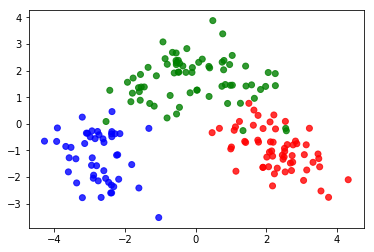

In [0]:
# Padronizando os dados para obtenção do PCA
wine_data = StandardScaler().fit_transform(wine_db.data)

pca_wine = PCA(n_components=2)
wine_db_pca = pca_wine.fit_transform(wine_data)

# Plotagem dos pontos por cores em um gráfico
cor_wine = []

for i in range(len(wine_db.data)):
    if wine_db.target[i] == 2:
        cor_wine.append('b')
    elif wine_db.target[i] == 0:
        cor_wine.append('r')
    else:
        cor_wine.append('green')

print("Principal Component Analysis para base Wine (2 dimen)")
plt.scatter([i[0] for i in wine_db_pca], [j[1] for j in wine_db_pca], c=cor_wine,alpha=0.8)
plt.show()

Como é possível ver através do gráfico, a base wine é praticamente totalmente linearmente separável, quando reduzida de 13 dimensões para duas.

### Análise gráfica com tratamento dos dados por PCA

In [0]:
# Separação dos dados da base em teste e treino, usando o model_selection do sci-kit learn
# Definindo o resultado com 40% para teste e 60% para treino
x_wine_pca_treino, x_wine_pca_teste, y_wine_pca_treino, y_wine_pca_teste = train_test_split(wine_db_pca, wine_db.target, test_size=0.4)

wine_pca_knn = KNeighborsClassifier(n_neighbors=3, p=2)
wine_pca_knn.fit(x_wine_pca_treino, y_wine_pca_treino)

wine_pca_acuracia = wine_pca_knn.score(x_wine_pca_teste, y_wine_pca_teste)
print("Acurácia com PCA para base wine (2 dimen): " + str(round(wine_pca_acuracia * 100, 1)) + "%")

Acurácia com PCA para base wine (2 dimen): 95.8%


A classificação da base wine no algoritmo KNN para K=3, com PCA para redução para duas dimensões deu uma taxa de acerto significativamente superior a qualquer subset encontrado da base, mostrando o poder computacional e a eficiência superior na taxa de acertos da análise por componente principal.

## Exercícios

1. Faça mais análises com o exemplo do knn apresentado em aula. Apresente o código de cada um dos casos

  a) Varie o número de k. Experimente os valores menores e maiores do que o apresentado em sala de aula. Qual dos modelos que você testou obteve a melhor performance:
  
  b) Varie o percentual de teste. Aumente e diminua. Analise o impacto disso na medida em que a quantidade de pontos de treinamento se torna menor. A partir de que ponto há grande impacto ao reduzir o percentual de treinamento?
  
  c) Use as mesmas features de entrada do exemplo e tente prever o gênero. Experimente variações do modelo knn. Em algum cenário pode-se obter algum resultado satisfatório?
  
  d) Experimente utilizar o Naive Bayes no mesmo exemplo. Faça as mesmas análises apresentadas em sala de aula. Qual é melhor: algum dos cenários testados com o knn, ou o naive bayes? Lembre-se, há três tipos principais de Naive Bayes. Leia a documentação / slides e escolha o tipo mais adequado ao caso. Se necessário, teste variações da técnica de acordo com os parâmetros de documentação e o que foi aprendido em aula. Apresente o melhor resultado
  
  e) Faça o mesmo que d) para as árvores de classificação. 

2. Implemente um código que faça o download da base https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 . Analise as informações dos tumores e classifique-os em malignos ou benignos. Utilize os três algoritmos aprendidos em sala de aula e faça uma comparação daquele que tem o melhor desempenho. Exiba os resultados graficamente

3. Refine o exercício 2. Utilize técnicas de seleção de características (como a utilizada no exemplo, via mlxtend). Compare a relevância das features para a classificação para cada um dos algoritmos. É possível reduzir o número de características sem perder precisão na classificação? Avalie tanto a seleção sequencial quando a seleção por força bruta. Analise e exiba os resultados.

4. O sklearn tem um submódulo com algumas bases de dados (pesquise no google sklearn datasets). Crie um código para realizar a classificação dos tipos de plantas da `iris dataset`. Utilize os métodos de seleção de características para tentar não utilizar todas as características disponíveis. Aponte o melhor subconjunto de apenas 2 características para classificação. Utilize PCA para realizar redução de dimensionalidade. Compare com o PCA 2D com a seleção de características. Qual foi o melhor resultado? Quão melhor / pior é utilizar todas as características disponíveis? Apresente os resultados utilizando todos os três algoritmos aprendidos em sala de aula.

5. Utilize todos os recursos aprendidos e faça a classificação dos dados da base `wine dataset`, constante na biblioteca `sklearn`

======================================================================================

**DICA: é possível visualizar a árvore de classificação, e os critérios de divisão, com o código abaixo**
 
**`from sklearn import tree`**

**`import graphviz`**

**`data= tree.export_graphviz(classificador, out_file=None)`**

**`graph = graphviz.Source(data)`**

**`graph`**